# Sales Analysis

#### Import Libraries

In [1]:
import pandas as pd
import os

In [2]:
df=pd.read_csv('./Sales_data/Sales_April_2019.csv')
df.shape

(18383, 6)

### Merge the 12 months of sales data into a single csv file

In [3]:
files=[file for file in  os.listdir('./Sales_Data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
all_months_data.to_csv("all_months_data.csv",index=False)

### Read Updated DataFrame

In [4]:
dataset=pd.read_csv("all_months_data.csv")
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### check null values

In [5]:
dataset.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Clean null values

In [6]:
nan=dataset[dataset.isna().any(axis=1)]
nan

dataset=dataset.dropna(how='all')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


###  Check Dataset after clean values

In [7]:
dataset.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Add Month Column

In [8]:
dataset['Month']=dataset['Order Date'].str[0:2]
dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


### Find or and delete it

In [9]:
temp=dataset[dataset['Order Date'].str[0:2]=='Or']


temp=temp.dropna(how='all')


### change datatype

In [11]:
dataset=dataset[dataset['Order Date'].str[0:2]!='Or']
dataset['Month']=dataset['Order Date'].str[0:2]
dataset['Month']=dataset['Month'].astype('int32')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### convert columns to correct datatype

In [12]:
dataset['Quantity Ordered']=pd.to_numeric(dataset['Quantity Ordered'])
dataset['Price Each']=pd.to_numeric(dataset['Price Each'])

### Add sales columns and find the sales 

In [13]:
dataset['Sales']=dataset['Quantity Ordered']*dataset['Price Each']
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### 1.What was the best month for sales?How much earned that month

In [14]:
results=dataset.groupby('Month').sum()


##### Conclusion:The Month of December was the best month and earned total 4613443.34


### Visualization  :what was the best month for sales?how much earned that month

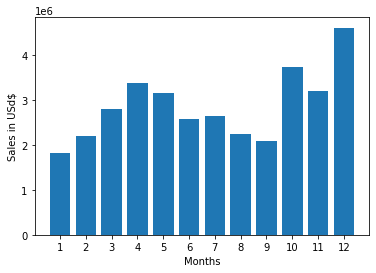

In [15]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel("Sales in USd$")
plt.show()

### Apply functions on Purchase address column

In [16]:
def get_add(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

dataset['City']=dataset['Purchase Address'].apply(lambda x:f"{get_add(x)} ({get_state(x)})")
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### 2.which city had the best sales?

In [20]:
result=dataset.groupby('City').sum().reset_index()
result

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta (GA),16602,2779908.20,104794,2795498.58
1,Austin (TX),11153,1809873.61,69829,1819581.75
2,Boston (MA),22528,3637409.77,141112,3661642.01
3,Dallas (TX),16730,2752627.82,104620,2767975.40
4,Los Angeles (CA),33289,5421435.23,208325,5452570.80
5,New York City (NY),27932,4635370.83,175741,4664317.43
6,Portland (ME),2750,447189.25,17144,449758.27
7,Portland (OR),11303,1860558.22,70621,1870732.34
8,San Francisco (CA),50239,8211461.74,315520,8262203.91
9,Seattle (WA),16553,2733296.01,104941,2747755.48


### Visulization:which city had the best sales?

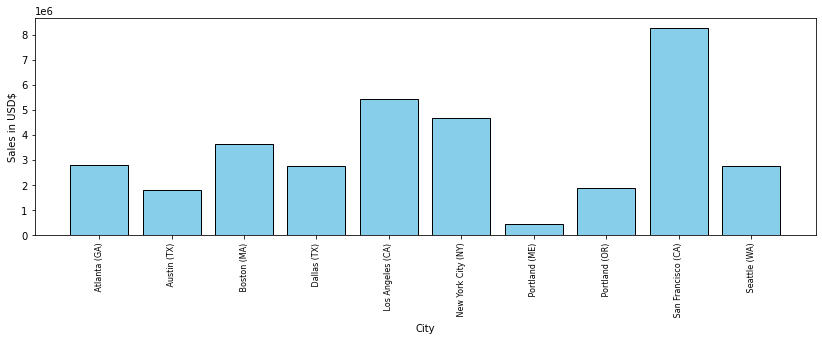

In [24]:
plt.figure(figsize=(14,4))
cities=result['City'].unique()
plt.bar(cities,result['Sales'],color='skyblue',  edgecolor='black')

plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel("City")
plt.ylabel("Sales in USD$")
plt.show()

### 3.what time should be display advertisements to maximize likelihood of customers buying product

In [28]:
dataset['Order Date']=pd.to_datetime(dataset['Order Date'])
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [59]:
dataset['Hour']=dataset['Order Date'].dt.hour
dataset['Minute']=dataset['Order Date'].dt.minute
dataset['Count']=1
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [76]:
hours=dataset.groupby(['Hour']).count().reset_index()


#### Visualization:what time should be display advertisements to maximize likelihood of customers buying product

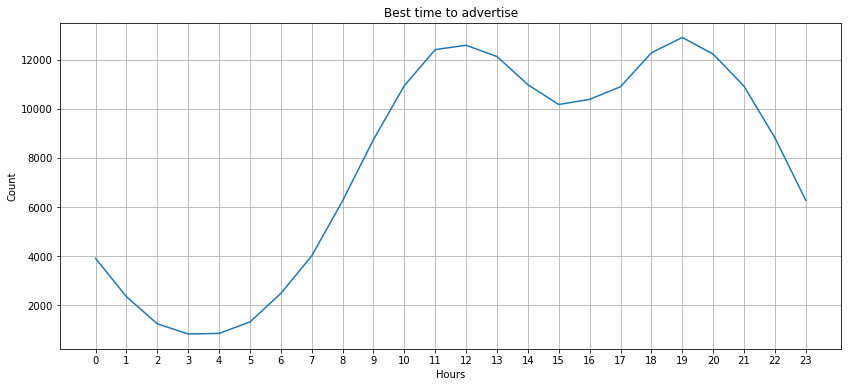

In [78]:
plt.figure(figsize=(14,6))
plt.plot(hours['Hour'],hours['Count'])
hr=hours['Hour']
plt.xticks(hr)
plt.title("Best time to advertise")                                                          
plt.xlabel('Hours')  
plt.ylabel("Count")
plt.grid()
plt.show()                            
                             
                             

###### Conclusion:Best time 11 Am and 7Pm to advertise

### 4.What products are most often sold

In [109]:
df=dataset[dataset['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_24944/671899071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [113]:
df[['Order ID','grouped']].drop_duplicates()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [125]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
  print(key ,value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


In [145]:
product_group=dataset.groupby('Product')['Quantity Ordered'].sum().reset_index()
product_group

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


### Visualization

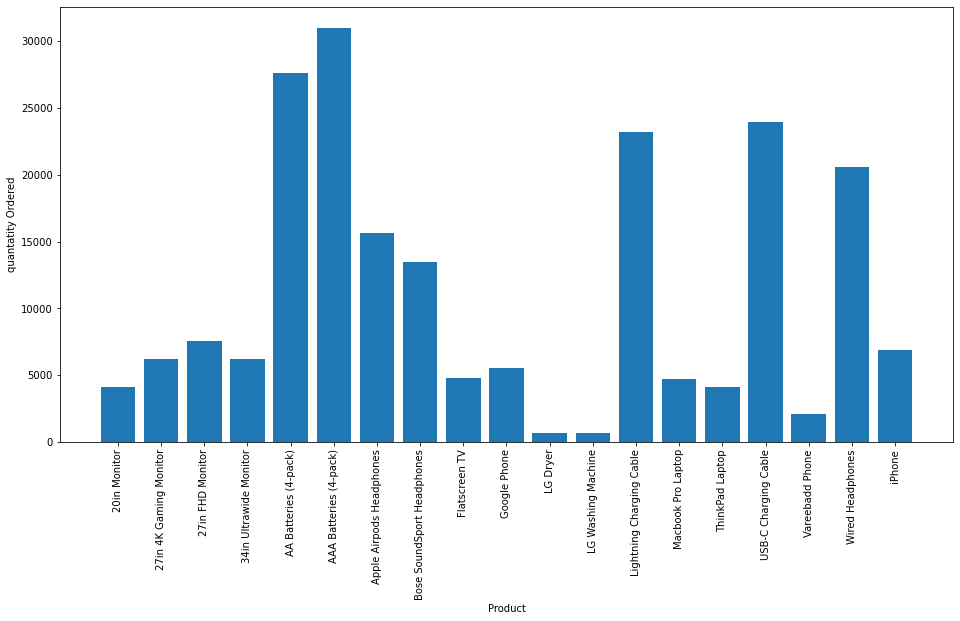

In [148]:
plt.figure(figsize=(16,8))
plt.bar(product_group['Product'],product_group['Quantity Ordered'])
prd=product_group['Product']
plt.xticks(prd,rotation='vertical')
plt.xlabel("Product")
plt.ylabel("quantatity Ordered")
plt.show()

In [151]:
pro_price=dataset.groupby('Product')['Price Each'].mean().reset_index()
pro_price

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_24944/599288488.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prd,rotation='vertical')


<Figure size 1152x648 with 0 Axes>

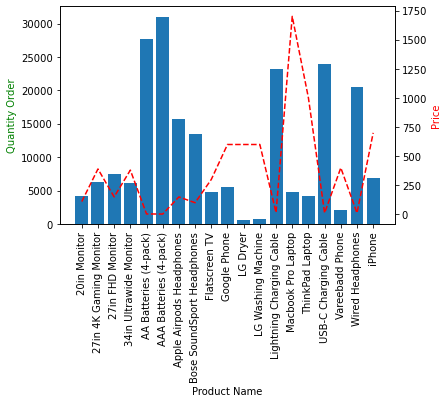

In [174]:
plt.figure(figsize=(16,9))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(product_group['Product'],product_group['Quantity Ordered'])
ax2.plot(pro_price['Product'],pro_price['Price Each'],'r--')
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Order",color='g')   
ax2.set_ylabel("Price",color='r')   
ax1.set_xticklabels(prd,rotation='vertical')       
plt.show()        